In [1]:
import imgaug

In [1]:
import sys
sys.path.append('..')
from modules.training_helpers import *
from modules.configfile import config
import logging
import random as random
import optparse
import cPickle as pickle
import h5py
import numpy as np
random.seed(config['seed'])

/home/anmol/.virtualenvs/brats/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [96]:
from modules.transformations import translation_matrix, shear_matrix, scale_matrix

In [6]:
R = random_rotation_matrix(np.random.rand(3))

INFO:training_helpers.py:Current std_scale = 6
INFO:training_helpers.py:[Training] Generating patches from Patient ID = 97, num = 0


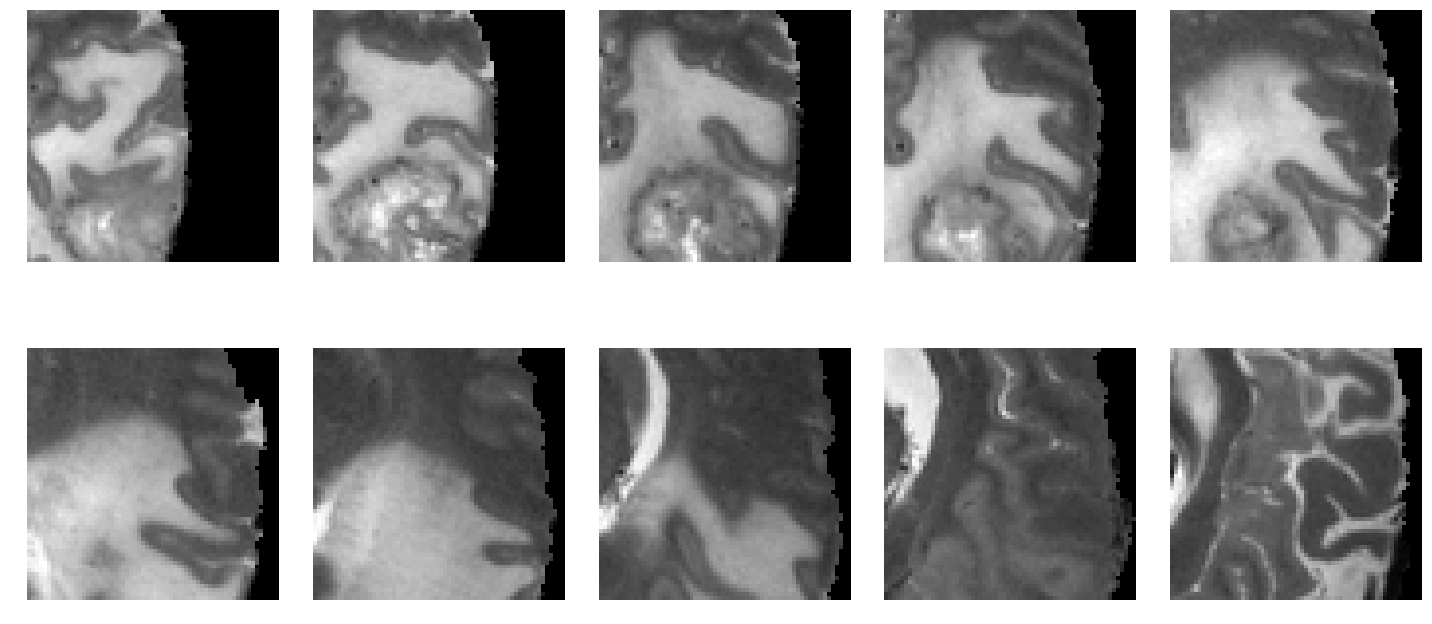

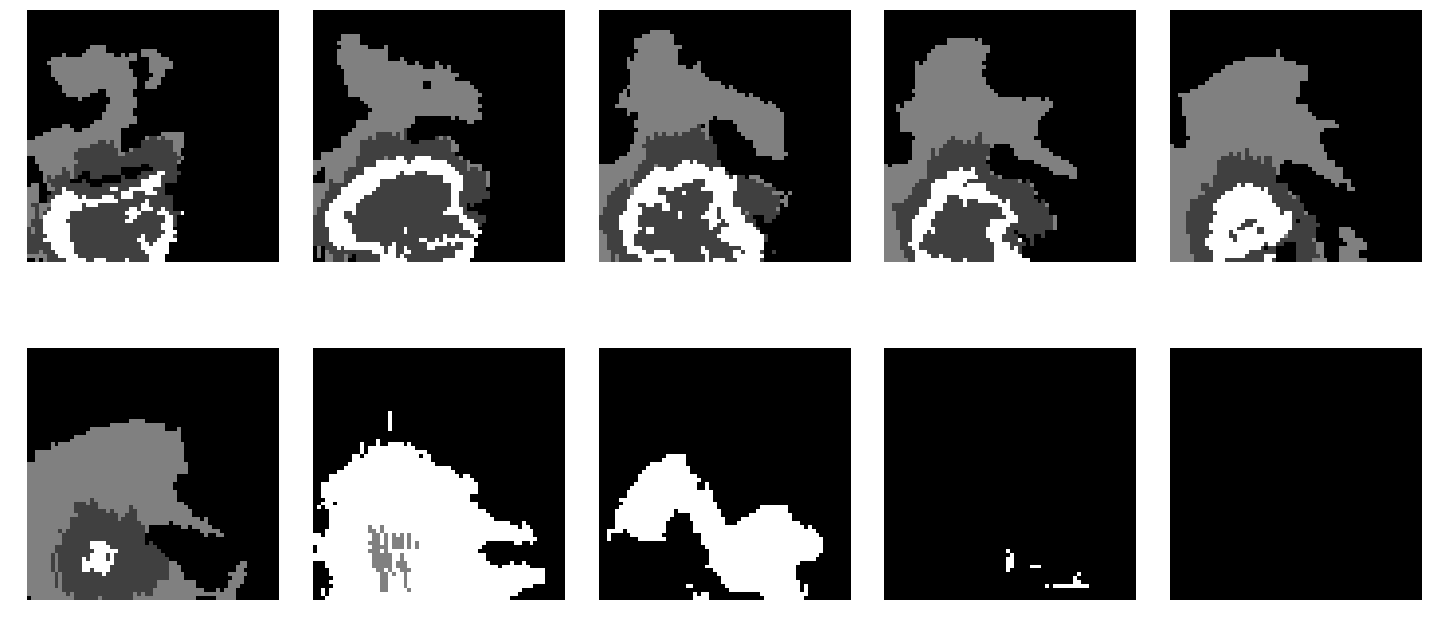

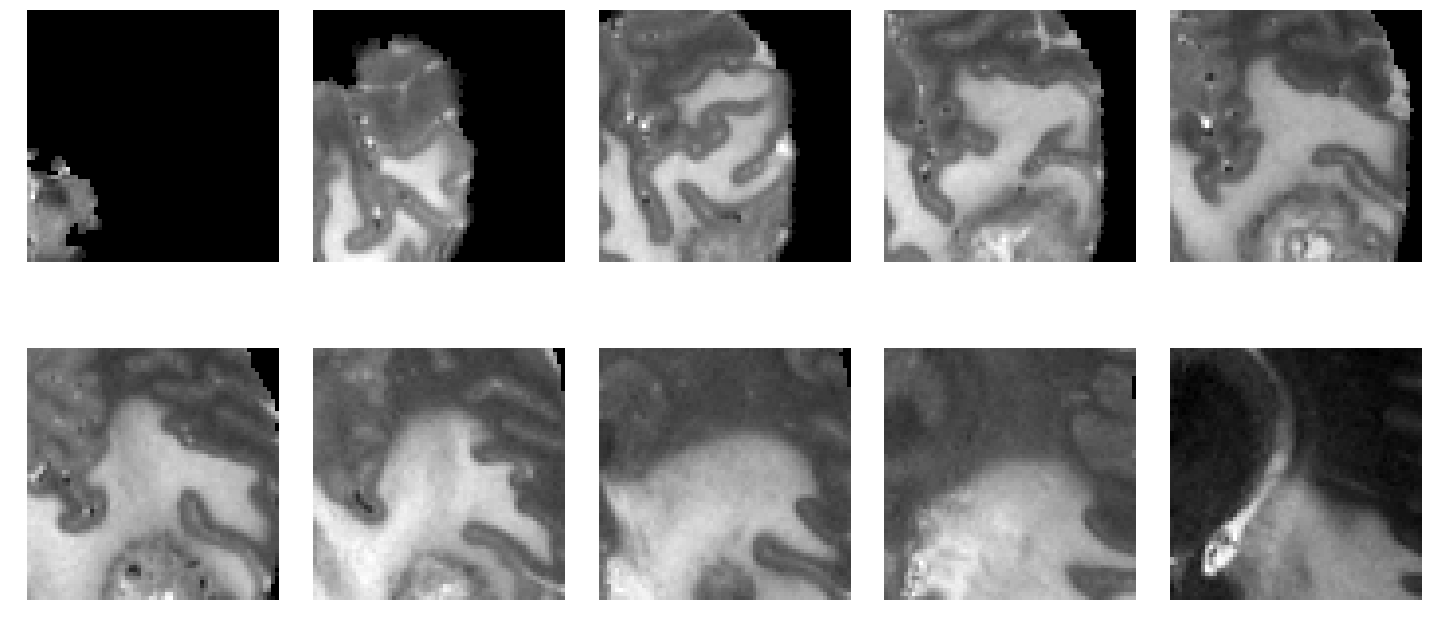

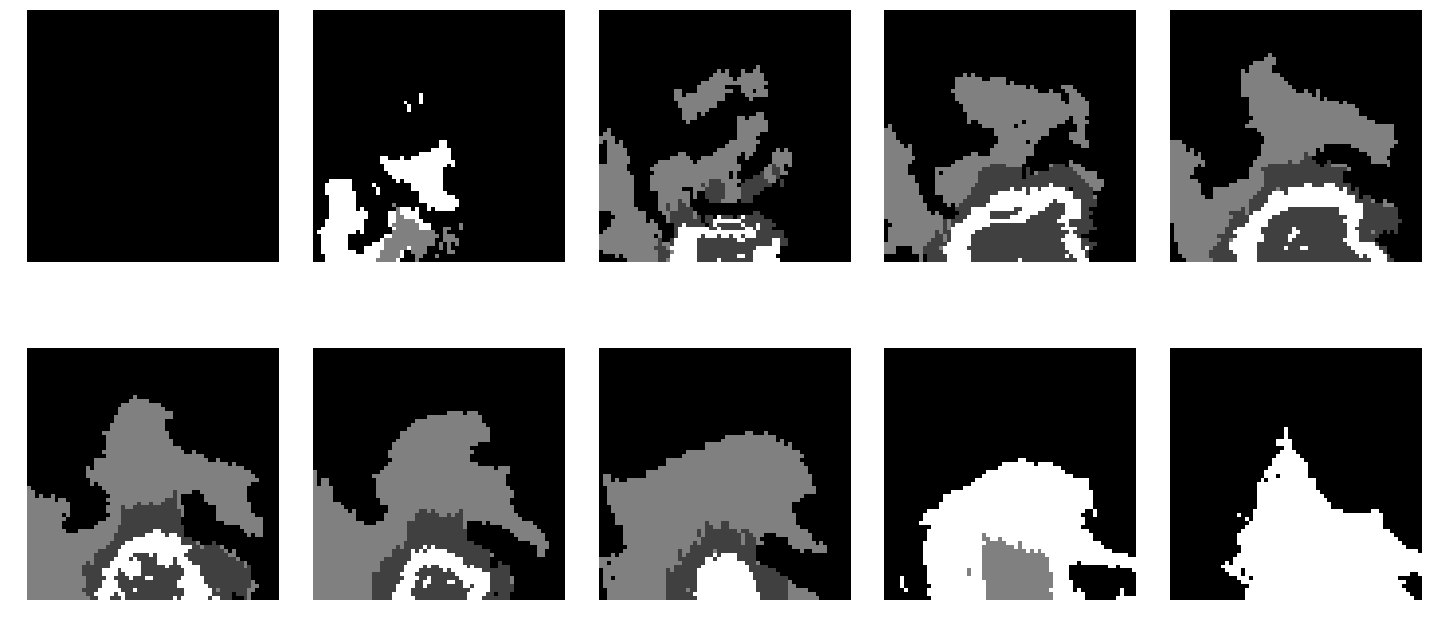

((2, 4, 64, 64, 64), (2, 3, 64, 64, 64))


In [8]:
mean_var = pickle.load(open(config['saveMeanVarCombinedData'], 'rb'))

# open new database with cropped images

if config['gen_patches_from'] == 'cropped':
    hdf5_file = h5py.File(config['hdf5_filepath_cropped'], mode='r')
    hdf5_file_g = hdf5_file['preprocessed']
else:
    hdf5_file = h5py.File(config['hdf5_filepath_prefix'], mode='r')
    hdf5_file_g = hdf5_file['original_data']

# get all the HGG/LGG data
training_data = hdf5_file_g['training_data_hgg']
training_data_segmasks = hdf5_file_g['training_data_segmasks_hgg']

# ======================================================================================

# --------------------------------------------------------------------------------------
# split data into training and testing
# --------------------------------------------------------------------------------------
indices = list(range(0, training_data.shape[0]))
random.shuffle(indices) # in-place shuffling

train_end = int((len(indices) * config['data_split']['train']) / 100.0)
train_indices = indices[0:train_end]
test_indices = indices[train_end:]

# ======================================================================================
batch_size = 10
augment = ['permute', 'remove_seq', 'add_noise']
train_gen = generate_patch_batches(X=training_data, Y=training_data_segmasks,
                                   t_i=train_indices, mean_var=mean_var, batch_size=batch_size, debug_mode=True,
                                   applyNorm=False, augment=augment)

test_gen = generate_patch_batches(X=training_data, Y=training_data_segmasks,
                                  t_i=test_indices, mean_var=mean_var, batch_size=batch_size, debug_mode=True,
                                  applyNorm=False, augment=augment)

count = 0
for x_patches, y_patches in test_gen:
    print(x_patches.shape, y_patches.shape)
    break

In [45]:
pat = training_data[0]
pat_seg = training_data_segmasks[0]

In [46]:
pat.shape

(4, 240, 240, 155)

In [47]:
pat_seg.shape

(240, 240, 155)

In [48]:
from scipy.ndimage import affine_transform

# Translation

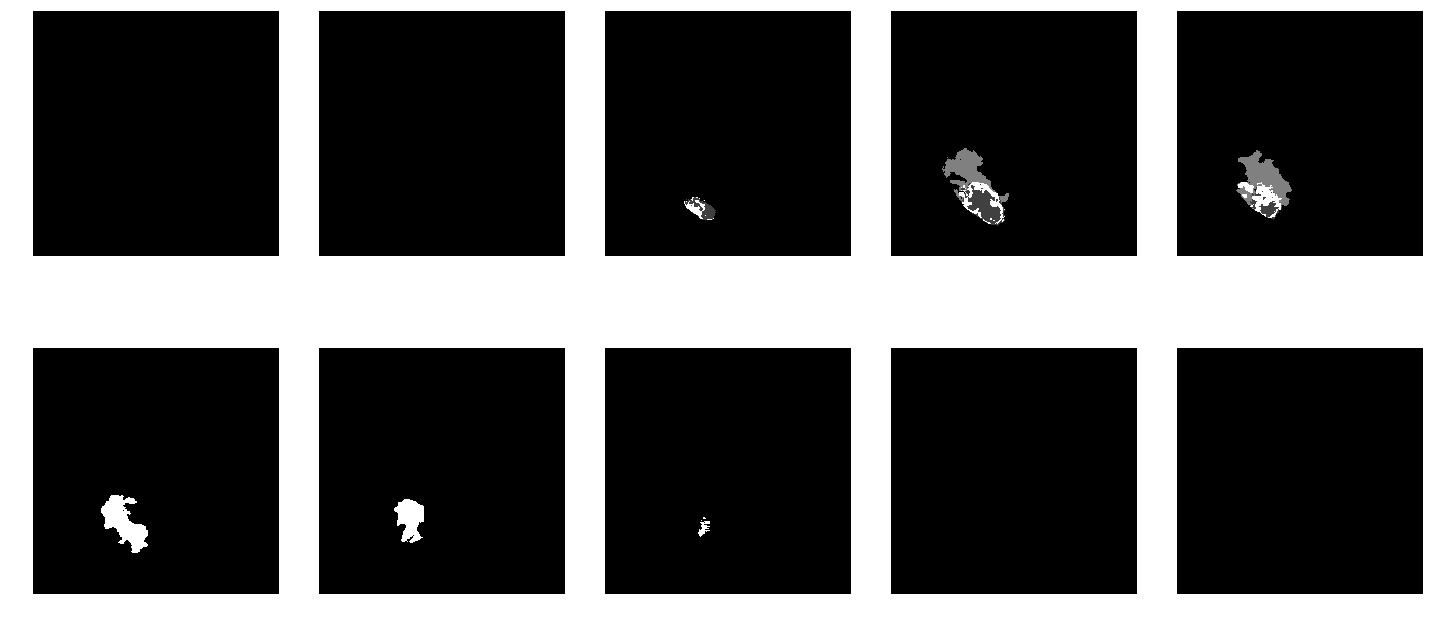

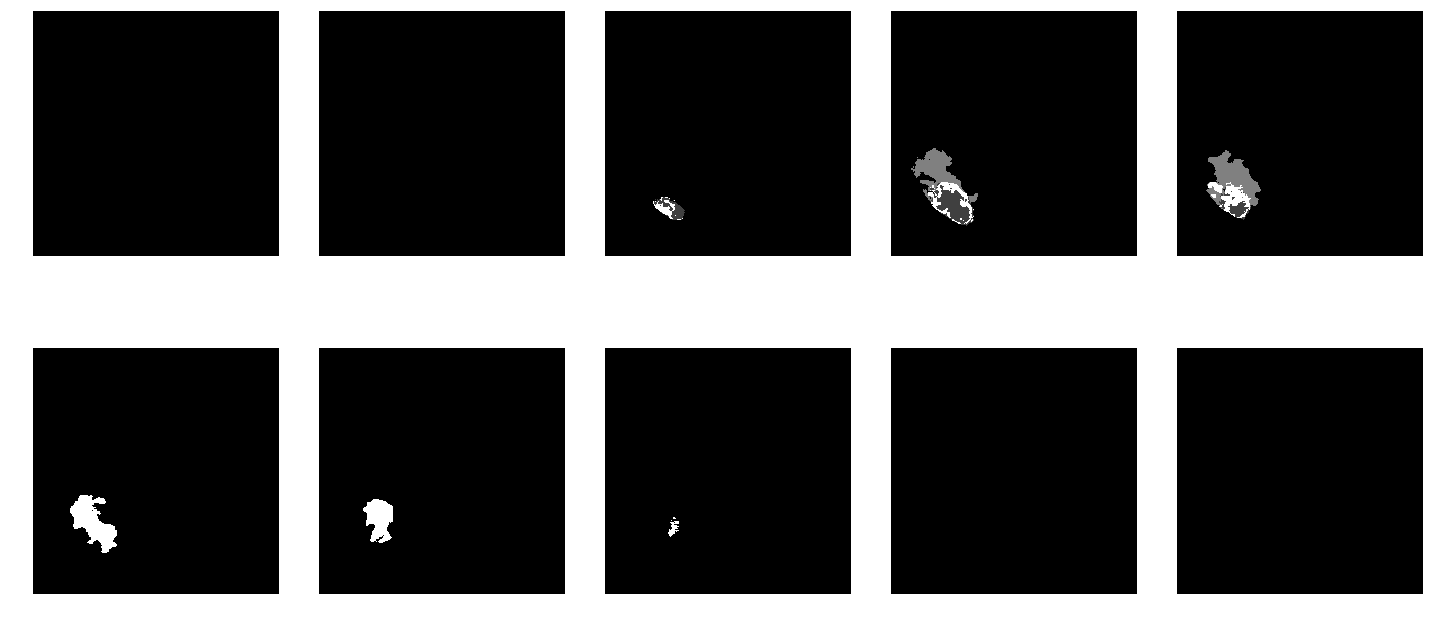

In [83]:
T = translation_matrix([0, 30, 0])
pat_seg_tr = affine_transform(pat_seg, T, order=1, prefilter=False)
viewArbitraryVolume(pat_seg, slice_idx=2, modality=1)
viewArbitraryVolume(pat_seg_tr, slice_idx=2, modality=1)

# Shearing

In [86]:
import random, math

In [141]:
np.random.random(3) - 0.5

array([0.20099932, 0.05139796, 0.1303609 ])

In [148]:
angle = (random.random() - 0.5) * 4 * math.pi
direct = np.random.random(3) - 0.5
point = [120, 120, 75]
normal = np.cross(direct, np.random.random(3))
S = shear_matrix(angle, direct, point, normal)

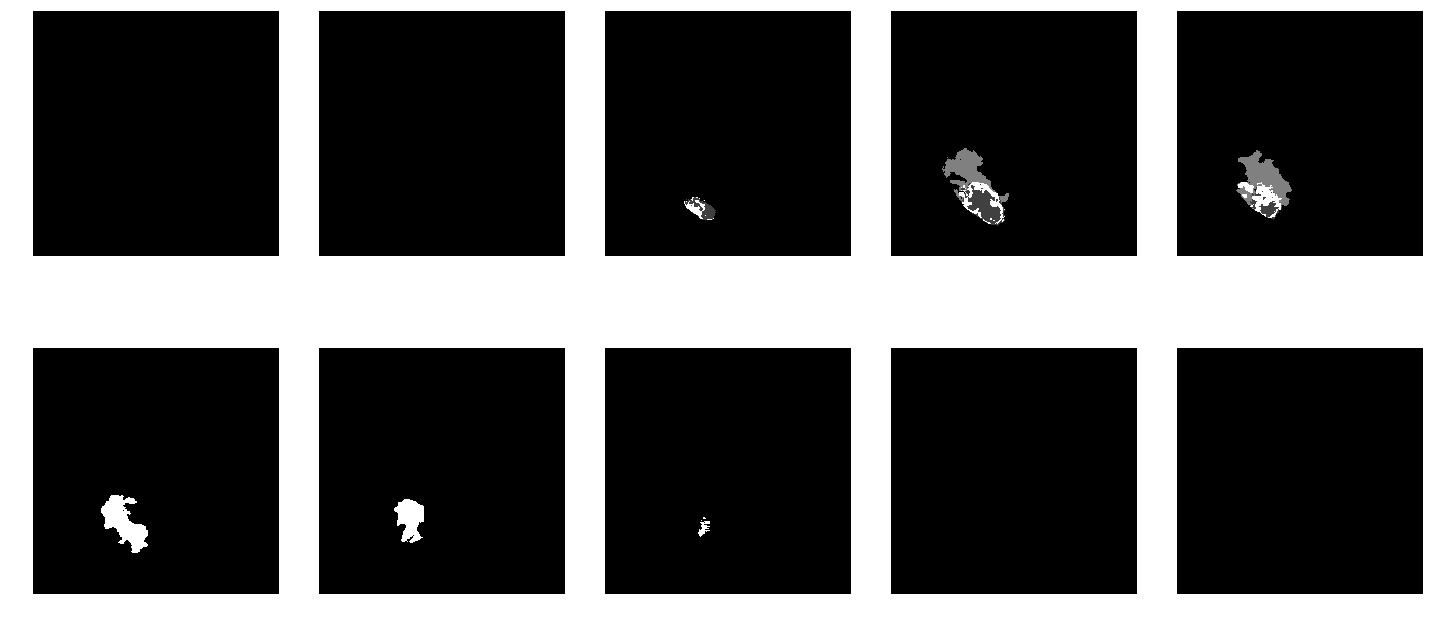

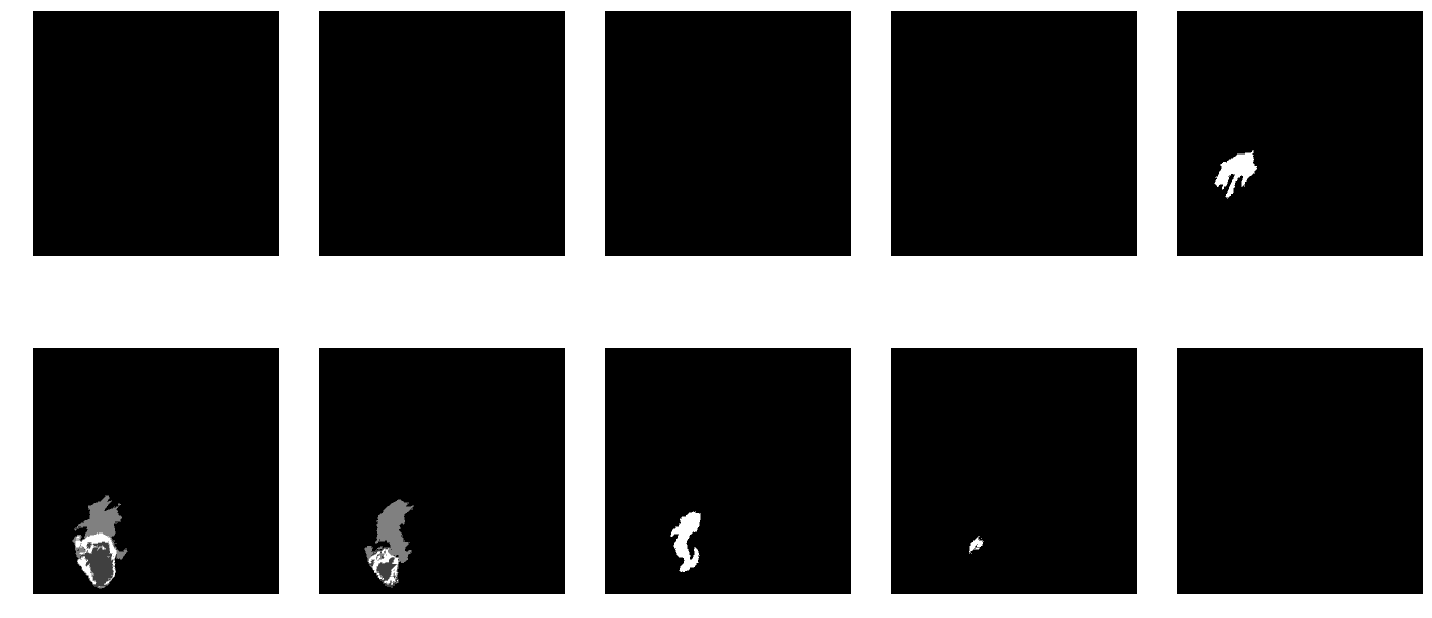

In [153]:
pat_seg_tr = affine_transform(pat_seg, S, order=1, prefilter=False)
viewArbitraryVolume(pat_seg, slice_idx=2, modality=1)
viewArbitraryVolume(pat_seg_tr, slice_idx=2, modality=1)

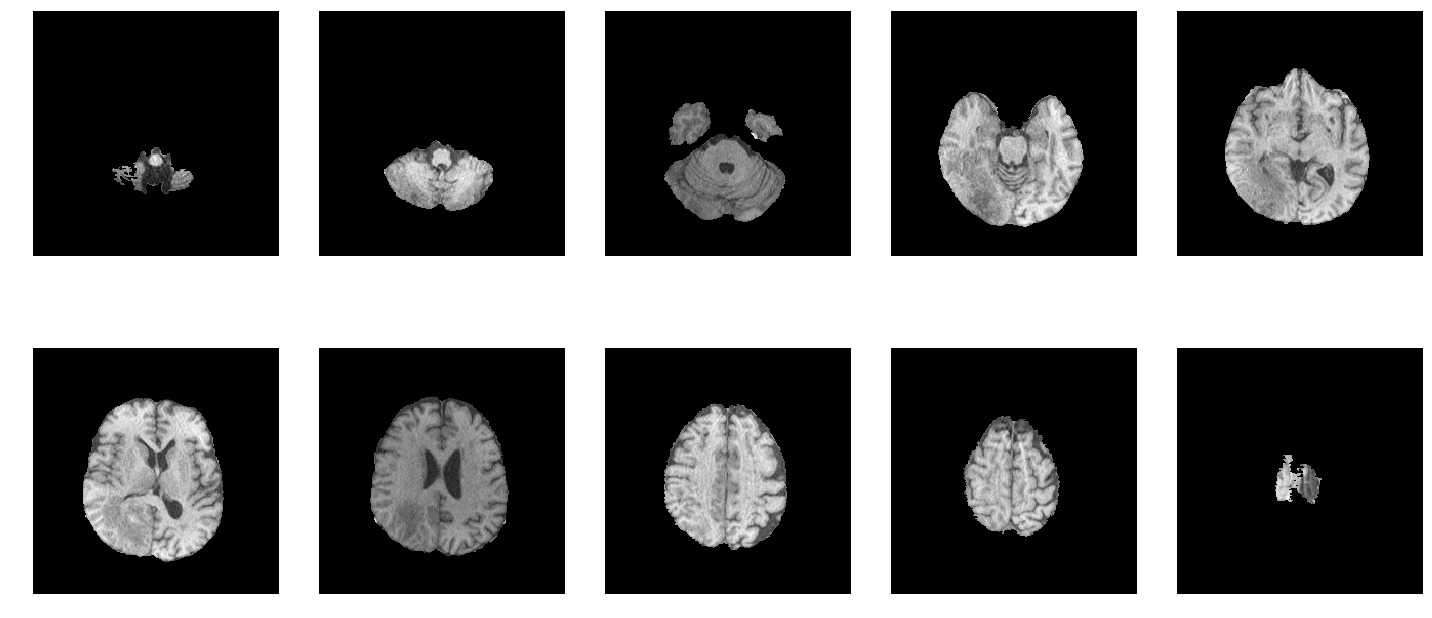

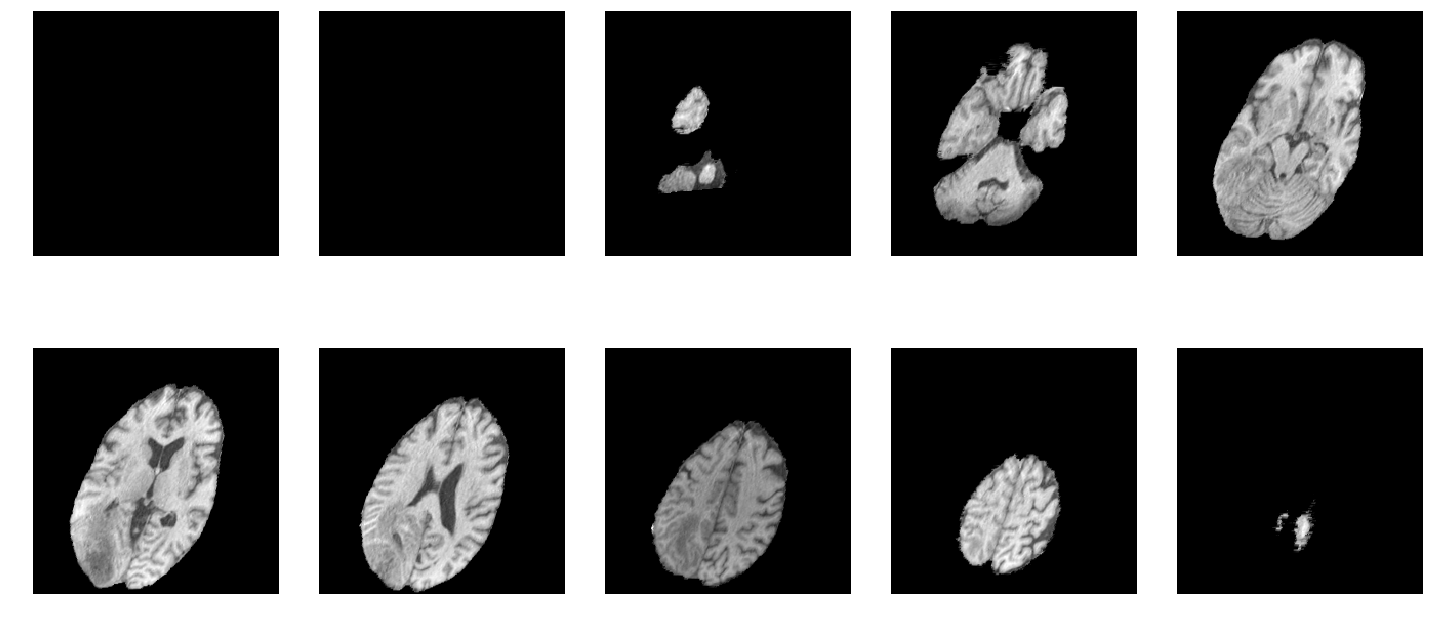

In [152]:
pat_tr = affine_transform(pat[0], S, order=1, prefilter=False)
viewArbitraryVolume(pat[0], slice_idx=2, modality=1)
viewArbitraryVolume(pat_tr, slice_idx=2, modality=1)

# Scaling

Range = 0.5 to 1.5

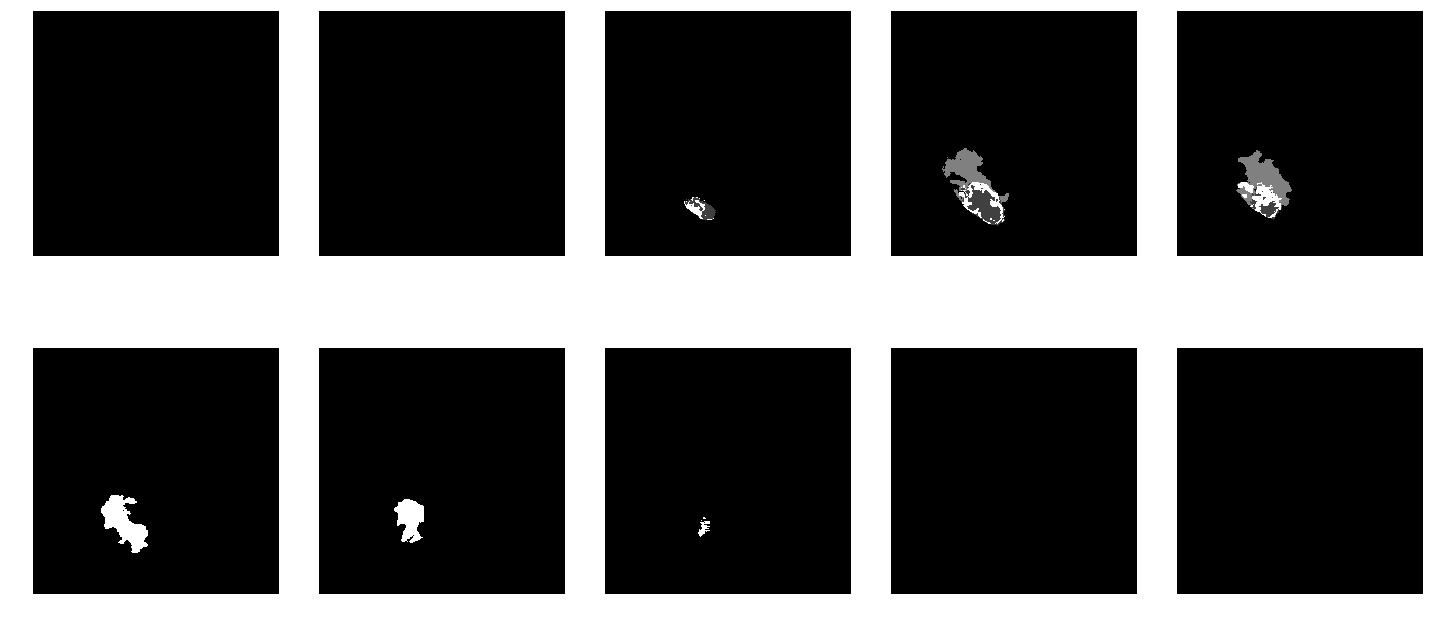

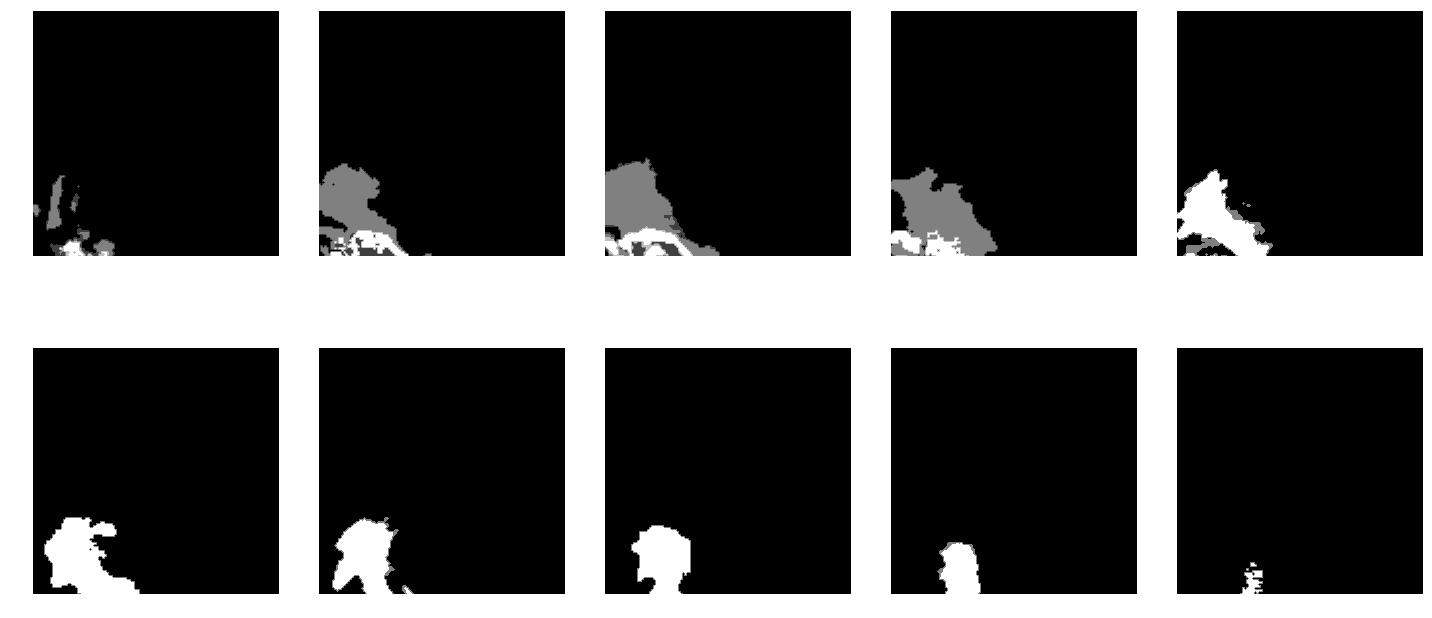

In [111]:
S = scale_matrix(0.5, origin=[120, 120, 75])
pat_seg_tr = affine_transform(pat_seg, S, order=1, prefilter=False)
viewArbitraryVolume(pat_seg, slice_idx=2, modality=1)
viewArbitraryVolume(pat_seg_tr, slice_idx=2, modality=1)b

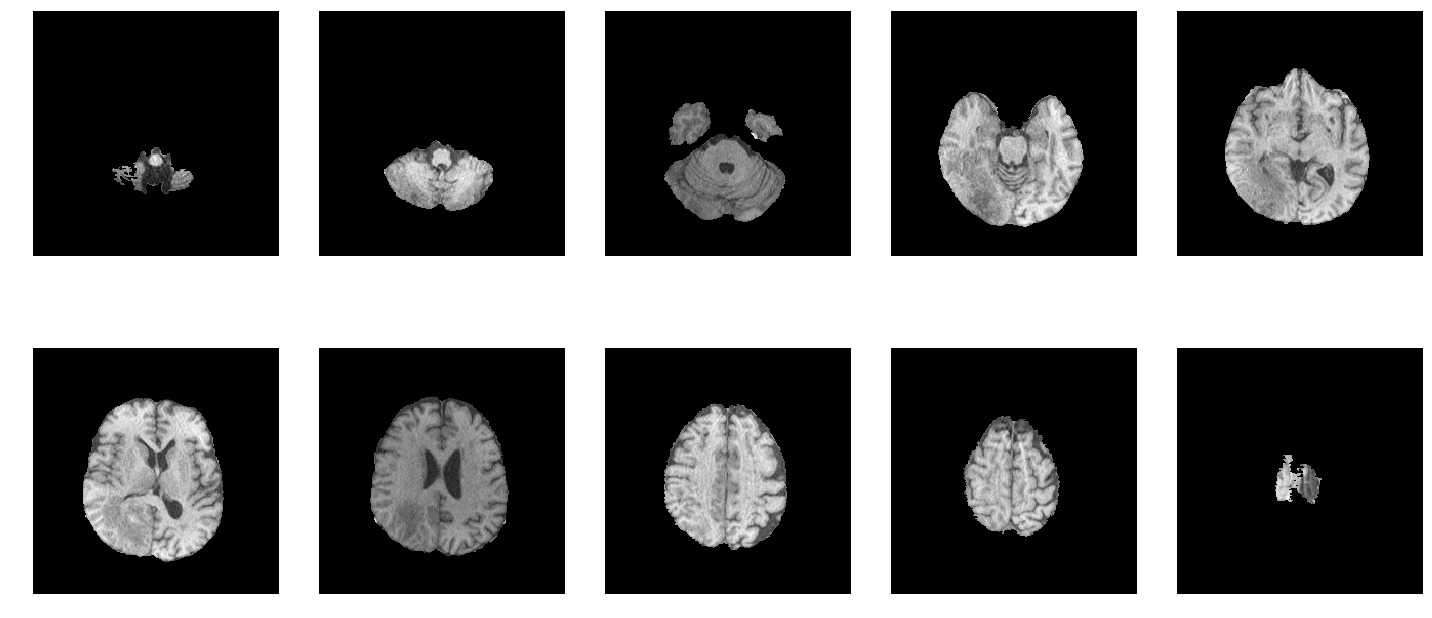

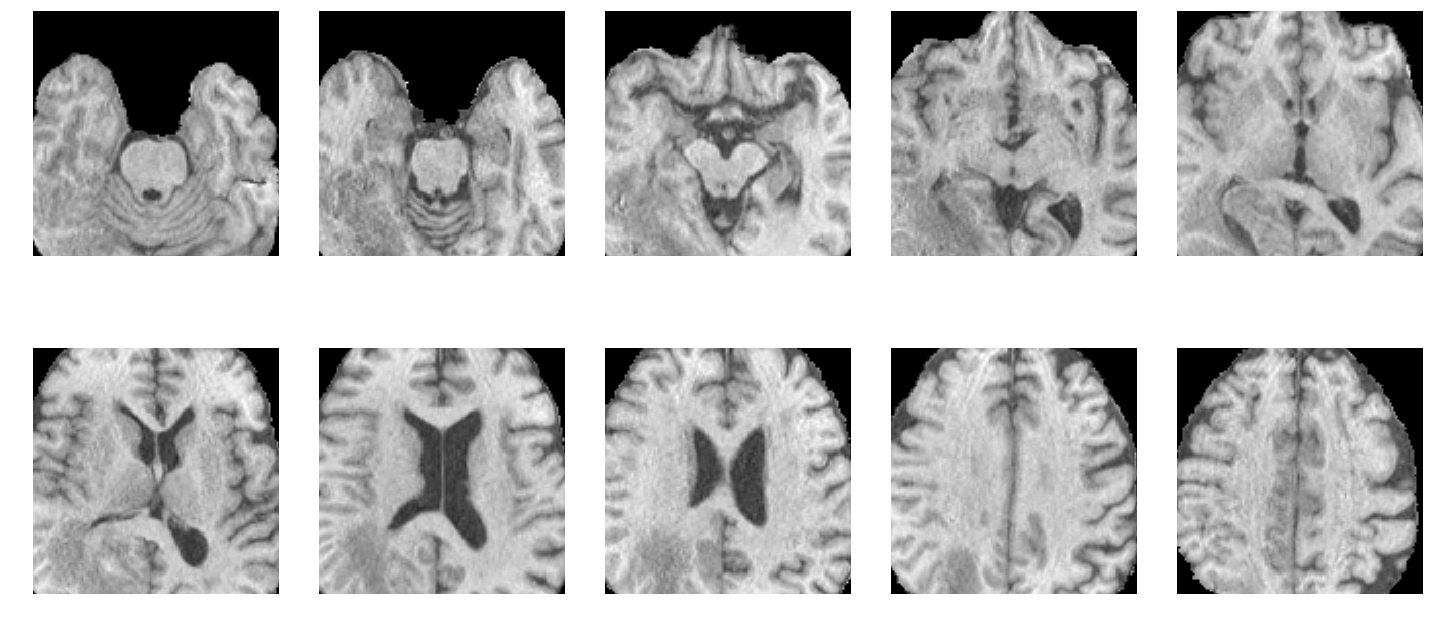

In [112]:
pat_tr = affine_transform(pat[0], S, order=1, prefilter=False)
viewArbitraryVolume(pat[0], slice_idx=2, modality=1)
viewArbitraryVolume(pat_tr, slice_idx=2, modality=1)